In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
x, y = datasets.make_moons(noise=0.15,random_state=666)



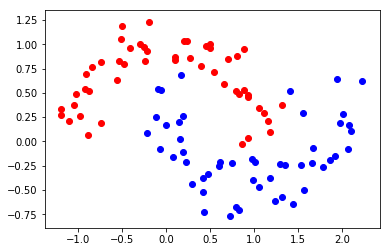

In [3]:
plt.scatter(x[y==0,0],x[y==0,1],color = "red")
plt.scatter(x[y==1,0],x[y==1,1],color = "blue")



In [8]:
from sklearn.pipeline import  Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
def gausvm(gamma):
    return Pipeline([("scale",StandardScaler()),
                     ("svm",SVC(kernel="rbf",gamma=gamma))])

In [9]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


d:\python\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


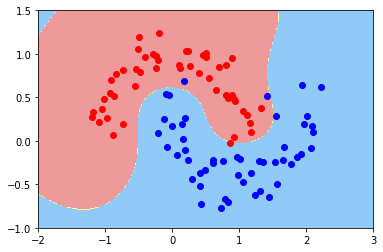

In [16]:
gau = gausvm(gamma=1)
gau.fit(x,y)
plot_decision_boundary(gau,axis=[-2,3,-1,1.5])
plt.scatter(x[y==0,0],x[y==0,1],color = "red")
plt.scatter(x[y==1,0],x[y==1,1],color = "blue")